# Exercise: Create Handwritten Digits Classifier
Explore the task of classifying handwritten digits using machine learning. Start with traditional machine learning models to show the limitation (linearity). Then, use neural networks to improve accuracy (non-linear). 

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##Import the sample data from sklearn
digits = load_digits()

In [2]:
##Explore the data by listing the keys
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
##Convert the target(labels) to a series and the data to a dataframe
labels = pd.Series(digits['target'])
data = pd.DataFrame(digits['data'])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


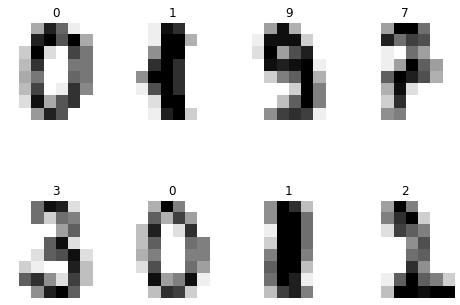

In [4]:
##Convert the images to a variable
images = digits['images']

##Create a figure to display sample images
fig = plt.figure(figsize=(8,6))

##Image samples to display
samples = [0, 99, 199, 299, 999, 1099, 1199, 1299]

##Image location in the figure
i = 0

##Loop through the image samples and display in the figure
for n in samples:
    plt.subplot(2,4,i+1)
    plt.imshow(images[n], cmap='gray_r')
    plt.title(labels[n])
    plt.axis('off')
    i += 1 

## K-Nearest Neighbors Model
First apply K-Nearest Model and evaluate the accuracy.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

##Create a function for training the data using k-nearest neighbor
def train(neighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(train_features, train_labels)
    return knn

##Create a function for testing the data
def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    df = pd.DataFrame()
    df['correct_label'] = test_labels
    df['predicted_label'] = predictions
    accuracy = sum(df['correct_label'] == df['predicted_label']) / len(df)
    return accuracy

##Create a function to cross validate using k-folds (even split between train and test)
def cross_validate(k, data, target):
    kf = KFold(n_splits=4, random_state=2, shuffle=True)
    
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(data):
        train_features = data.loc[train_index]
        test_features = data.loc[test_index]
        train_labels = target.loc[train_index]
        test_labels = target.loc[test_index]
        
        model = train(k, train_features, train_labels)
        train_accuracy = test(model, train_features, train_labels)
        train_accuracies.append(train_accuracy)
        test_accuracy = test(model, test_features, test_labels)
        test_accuracies.append(test_accuracy)
        
    return train_accuracies, test_accuracies

##Display the results
train_accuracies, test_accuracies = cross_validate(1, data, labels)
mean_train_accuracy = np.mean(train_accuracies)
mean_test_accuracy = np.mean(test_accuracies)
print('mean train accuracy: ', mean_train_accuracy)
print('mean test accuracy: ', mean_test_accuracy)

mean train accuracy:  1.0
mean test accuracy:  0.9888728037614452


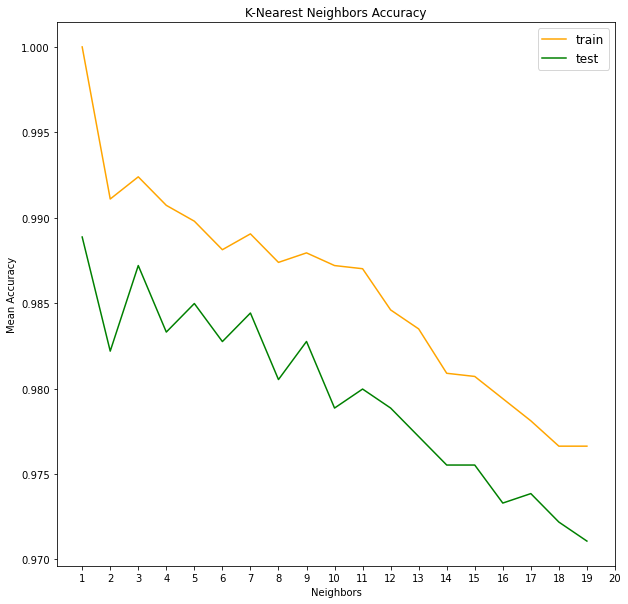

In [6]:
##Plot the accuracy of different values of K
mean_train_accuracies = []
mean_test_accuracies = []

for k in range(1, 20):
    train_accuracies, test_accuracies = cross_validate(k, data, labels)
    mean_train_accuracies.append(np.mean(train_accuracies))
    mean_test_accuracies.append(np.mean(test_accuracies))

plt.figure(figsize=(10,10))
x = range(1, 20)
y = mean_train_accuracies
plt.plot(x, y, color='orange', label='train')
y= mean_test_accuracies
plt.plot(x, y, color='green', label='test')

plt.xlabel('Neighbors')
plt.xticks(np.arange(1, 21, 1.0))
plt.ylabel('Mean Accuracy')
plt.title('K-Nearest Neighbors Accuracy')
plt.legend(fontsize='large')

### K-Nearest Neighbor Results
Accuracy peaked at one number of neighbors and rose again (especially for the test data) at three neighbors and then drops off. 

The downside of K-Nearest Neighbors are high memory usage (each new unseen observation requires many comparisons to seen observations) and there is no model representation to debug and explore.

## Neural Network with a Single Hidden Layer
Use MLPClassifier package from scikit-learn with a single hidden layer.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

In [8]:
##Create a new function for training using neural network
def train_nn(n_neurons, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=n_neurons, random_state=2)
    mlp.fit(train_features, train_labels)
    return mlp

##Create a new function for using the train_nn function to cross validate (test function can remain unchanged)
def nn_cross_validate(n_neurons, df, target):
    kf = KFold(n_splits=4, random_state=2, shuffle=True)
    accuracies = []
    for train_index, test_index in kf.split(data):
        train_features = data.loc[train_index]
        test_features = data.loc[test_index]
        train_labels = target.loc[train_index]
        test_labels = target.loc[test_index]
        
        model = train_nn(n_neurons, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        accuracies.append(accuracy)
        
    return accuracies

##Verify the function with a single input
nn_accuracies = nn_cross_validate((8,), data, labels)
np.mean(nn_accuracies)

0.9298799802029201

Text(0.5, 1.0, 'Accuracy of Nueral Network with Single Hidden Layer')

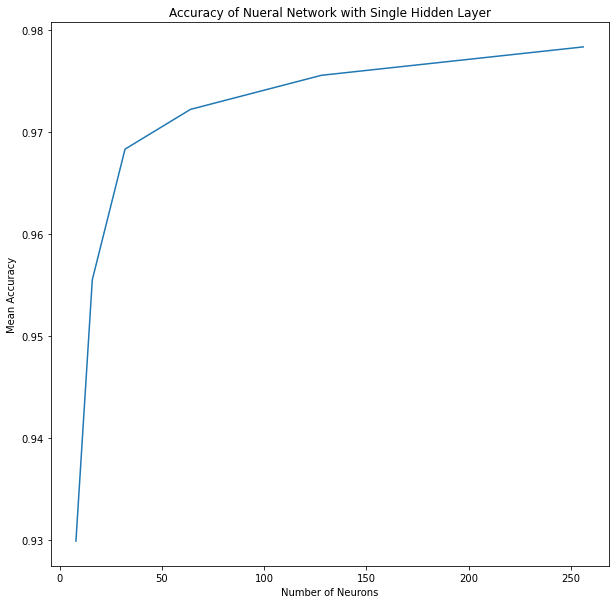

In [9]:
##Test various neuron numbers and list the accuracies
nuerons = [(8,),
           (16,),
           (32,),
           (64,),
           (128,),
           (256,)]

nn_mean_accuracies = []
for n in nuerons:
    accuracies = nn_cross_validate(n, data, labels)
    nn_mean_accuracies.append(np.mean(accuracies))
    
##Plot the accuracies on a graph
plt.figure(figsize=(10,10))
x = [i[0] for i in nuerons]
y = nn_mean_accuracies
plt.plot(x, y)
plt.xlabel('Number of Neurons')
plt.ylabel('Mean Accuracy')
plt.title('Accuracy of Nueral Network with Single Hidden Layer')

In [10]:
##Re-write the Cross Validate function to split out the Train and Test Accuracy
def nn_cross_validate(n_neurons, df, target):
    kf = KFold(n_splits=4, random_state=2, shuffle=True)
    
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(data):
        train_features = data.loc[train_index]
        test_features = data.loc[test_index]
        train_labels = target.loc[train_index]
        test_labels = target.loc[test_index]
        
        model = train_nn(n_neurons, train_features, train_labels)
        train_accuracy = test(model, train_features, train_labels)
        test_accuracy = test(model, test_features, test_labels)
        train_accuracies.append(train_accuracy) 
        test_accuracies.append(test_accuracy) 
    
    return train_accuracies, test_accuracies

##Verify the function with a single input
train_accuracies, test_accuracies = nn_cross_validate((8,), data, labels)
mean_train_accuracies = np.mean(train_accuracies)
mean_test_accuracies = np.mean(test_accuracies)
print("Mean Train Accuracies: ", mean_train_accuracies)
print("Mean Test Accuracies: ", mean_test_accuracies)

Mean Train Accuracies:  0.9764439715468378
Mean Test Accuracies:  0.9298799802029201


In [11]:
##Create a function for drawing a plot since we'll be testing various neural network layers and k-folds
##Update the Cross Validation function to accept different K-Fold splits
def nn_cross_validate(n_neurons, df, target, splits=4):
    kf = KFold(n_splits=splits, random_state=2, shuffle=True)
    
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(data):
        train_features = data.loc[train_index]
        test_features = data.loc[test_index]
        train_labels = target.loc[train_index]
        test_labels = target.loc[test_index]
        
        model = train_nn(n_neurons, train_features, train_labels)
        train_accuracy = test(model, train_features, train_labels)
        test_accuracy = test(model, test_features, test_labels)
        train_accuracies.append(train_accuracy) 
        test_accuracies.append(test_accuracy) 
    
    return train_accuracies, test_accuracies

def plot_nn_accuracy(nuerons, title, splits=4):
    mean_train_accuracies = []
    mean_test_accuracies = []
    
    for n in nuerons:
        train_accuracies, test_accuracies = nn_cross_validate(n, data, labels, splits)
        mean_train_accuracies.append(np.mean(train_accuracies))
        mean_test_accuracies.append(np.mean(test_accuracies))
    
    plt.figure(figsize=(10,10))
    x = [i[0] for i in nuerons]
    y = mean_train_accuracies
    plt.plot(x, y, color='orange', label='train')
    y = mean_test_accuracies
    plt.plot(x, y, color='green', label='test')
    plt.xlabel('Number of Neurons')
    plt.ylabel('Mean Accuracy')
    plt.title(title)
    plt.legend(fontsize='large')
    
    return mean_train_accuracies, mean_test_accuracies

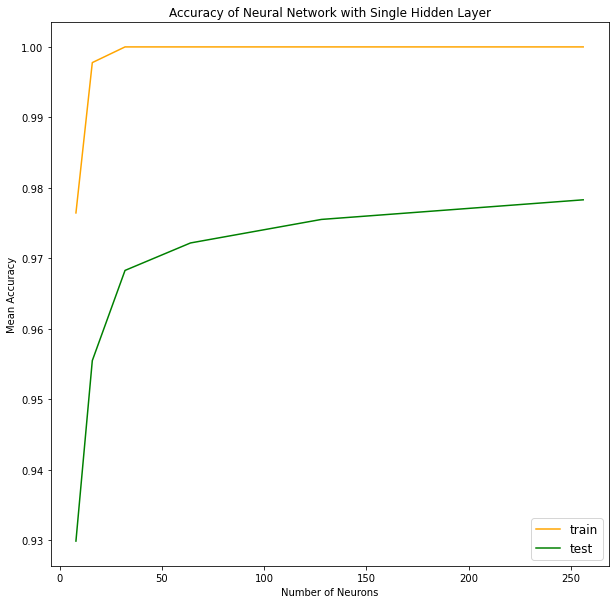

In [12]:
neurons = [(8,),
           (16,),
           (32,),
           (64,),
           (128,),
           (256,)]

mean_train_accuracies, mean_test_accuracies = plot_nn_accuracy(neurons, 'Accuracy of Neural Network with Single Hidden Layer')

In [13]:
mean_test_accuracies

[0.9298799802029201,
 0.9554875030932937,
 0.9682863152684978,
 0.9721826280623608,
 0.9755209106656768,
 0.9783036377134373]

### Results of Neural Network with Single Hidden Layer
The accuracy approaches 98% as we add neurons, but it's still lower than K-Nearest Neighbor. Next step is to track the results of additional hidden layers.

## Neural Network with a Two Hidden Layers

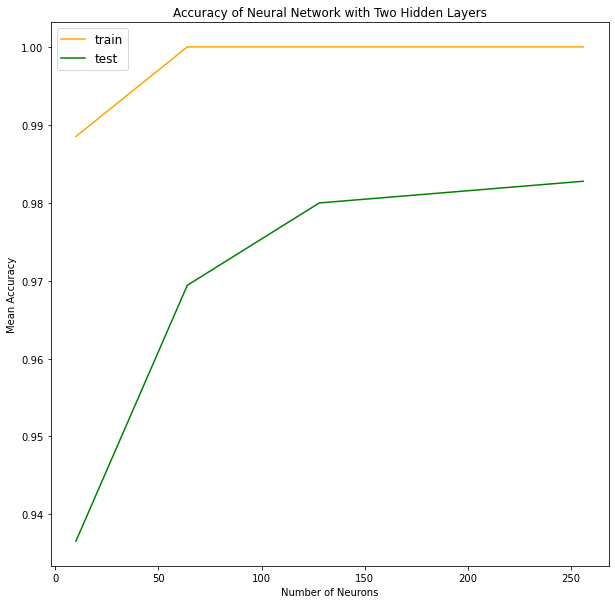

In [14]:
##Add a second layer of neurons
neurons = [(10,10),
           (64,64),
           (128,128),
           (256,256)]

mean_train_accuracies, mean_test_accuracies = plot_nn_accuracy(neurons, 'Accuracy of Neural Network with Two Hidden Layers')

In [15]:
mean_test_accuracies

[0.9365689185845087,
 0.9694023756495918,
 0.9799715416975996,
 0.9827567433803515]

## Neural Network with a Three Hidden Layers

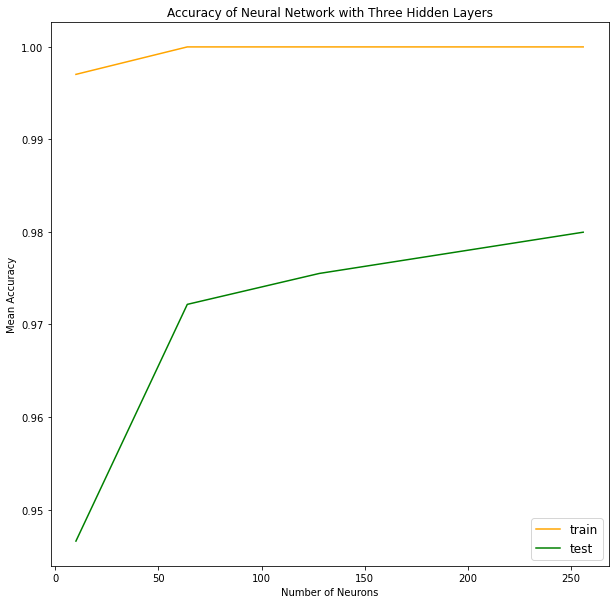

In [16]:
##Add a second layer of neurons
neurons = [(10,10,10),
           (64,64,64),
           (128,128, 128),
           (256,256, 256)]

mean_train_accuracies, mean_test_accuracies = plot_nn_accuracy(neurons, 'Accuracy of Neural Network with Three Hidden Layers')

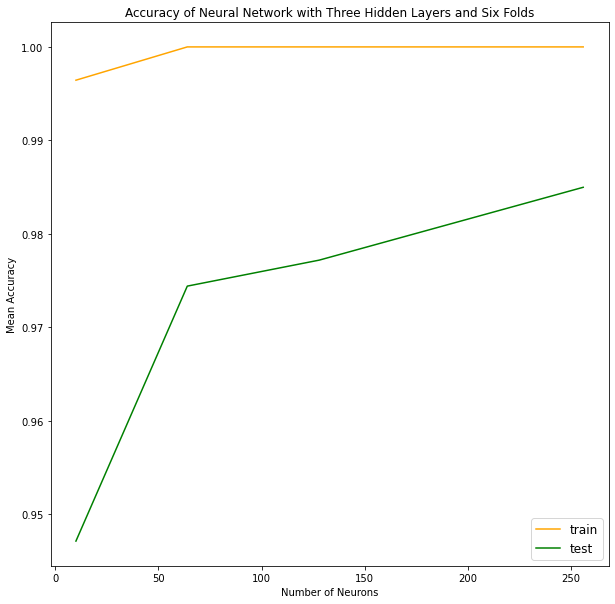

In [17]:
##Add additional folds to bring the total to 6
neurons = [(10,10,10),
           (64,64,64),
           (128,128, 128),
           (256,256, 256)]

mean_train_accuracies, mean_test_accuracies = plot_nn_accuracy(neurons, 'Accuracy of Neural Network with Three Hidden Layers and Six Folds', 6)

In [18]:
mean_test_accuracies

[0.9471367521367521,
 0.9744109996283911,
 0.9771924934968412,
 0.9849832775919732]

## Results
Three layers of neurons brought the accuracy to nearly 99% even with six fold cross validation